See also 
- https://github.com/matchms/matchms/issues/38
- https://github.com/matchms/matchms/issues/41


# 1.

In this step, we'll learn about

- importing functionality from ``matchms``
- loading one spectrum into a ``Spectrum`` object
- plotting a single spectrum with ``Spectrum.plot()`` (which doesn't exist yet)

RDKit WARNING: [11:32:33] Enabling RDKit 2019.09.3 jupyter extensions


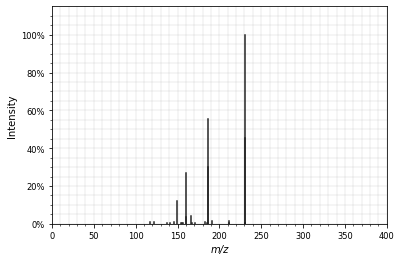

In [1]:
from pyteomics.mgf import MGF
from spectrum_utils.spectrum import MsmsSpectrum as Spectrum
from spectrum_utils.plot import spectrum as plot

spectrums = list(MGF("reference-spectrums.mgf", convert_arrays=1))

i = 3
mz = spectrums[i]["m/z array"]
intensity = spectrums[i]["intensity array"]

spectrum = Spectrum(identifier=None, precursor_mz=None, precursor_charge=None,
                    mz=mz, intensity=intensity)

plot(spectrum)

# 2.

In this step, we'll learn about:

- loading a reference spectrum
- plotting the spectrum side-by-side with the reference spectrum


In [ ]:
from matchms import Spectrum

# load a single spectrum into a Spectrum object
spectrum = Spectrum(filename="spectrum.mgf")

# load a single reference spectrum into a spectrum object
reference_spectrum = Spectrum(filename="reference_spectrum.mgf")

# visualize both
spectrum.plot()
reference_spectrum.plot()

# 3.

In this step, we'll learn about:

- Expressing the similarity between the two spectrums from the previous step as a number (aka a 'similarity score')


In [ ]:
from matchms import Spectrum, Scores
from matchms.similarity import tanimoto

# load a single spectrum into a Spectrum object
spectrum = Spectrum(filename="spectrum.mgf")

# load a single reference spectrum into a spectrum object
reference_spectrums = [Spectrum(filename="reference_spectrum.mgf")]

# instantiate a Scores object
scores = Scores(spectrum=spectrum, reference_spectrums=reference_spectrums)

# add the similarity function to the Scores instance
scores.add_similarity_function(tanimoto)

# let the Scores instance calculate the tanimoto similarity of spectrum to reference_spectrums[0]
scores.calculate()


# 4. 

In this step, we'll learn about:

- the necessity of harmonization functions

steps:

- run both the reference_spectrum and the (measured) spectrum through the harmonization, repeat steps from previous step.

In [ ]:
from matchms import Spectrum
from matchms.similarity import tanimoto
from matchms.harmonization import harmfun1

# load a single spectrum into a Spectrum object
spectrum = Spectrum(filename="spectrum.mgf")

# load a single reference spectrum into a spectrum object
reference_spectrums = [Spectrum(filename="reference_spectrum.mgf")]

# instantiate a Scores object
scores = Scores(spectrum=spectrum, reference_spectrums=reference_spectrums)

# add the harmonization function to the Scores instance
scores.add_harmonization_function(harmfun1)

# add the similarity function to the Scores instance
scores.add_similarity_function(tanimoto)

# let the Scores instance calculate the tanimoto similarity of the harmonized spectrum 
# to the harmonized reference_spectrums[0]:
scores.calculate()
